<a href="https://colab.research.google.com/github/divyansh1195/Machine-Learning-Projects/blob/main/Unsupervised%20ML/ML%20Project%20Clustering/ML_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Introduction
This assignment will help you to consolidate the concepts learnt in the session.
2.Problem Statement
Dataset Link
https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view
Hint:\
Problem 1:\
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance\
Problem 2:\
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.\
Problem 3:\
Identify which all stocks are moving together and which all stocks are different from
each other.

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt

df=pd.read_csv("data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
df["DATE"]= pd.to_datetime(df["DATE"])#convert date column to date-time
df.head(2)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-01 00:00:01.491226200,2363.6101,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,38.99,14.61,164.63,888.5500,49.85,219.11,39.43,274.08,31.78,81.03,124.89,58.820,77.725,330.73,72.43,37.47,119.385,167.740,33.74,46.645,126.86,59.72,83.54,29.02,28.37,63.49,78.46,89.90,33.3975,400.94,...,18.61,19.8901,70.69,36.26,124.66,164.62,47.04,106.27,107.65,124.5901,51.62,112.36,89.35,91.13,55.21,66.590,120.13,100.35,65.07,48.730,156.39,60.46,55.70,171.83,73.08,29.62,72.10,52.160,20.34,34.00,84.37,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.35
1,1970-01-01 00:00:01.491226260,2364.1001,42.36,143.70,130.32,82.08,102.14,85.65,59.84,121.48,39.01,14.71,164.68,887.1173,49.94,219.98,39.68,273.99,31.78,81.21,124.99,58.495,77.940,330.73,72.04,37.54,118.810,167.776,33.88,46.610,126.86,59.83,83.94,29.14,28.40,63.46,78.62,89.73,33.3950,400.40,...,18.51,19.8901,70.77,36.26,124.82,164.39,47.04,106.27,107.65,124.5901,51.58,112.36,89.35,91.21,55.12,66.355,120.13,100.03,65.04,48.752,157.19,59.93,55.81,171.54,72.95,29.64,72.18,52.245,20.32,34.07,84.37,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: datetime64[ns](1), float64(501)
memory usage: 158.0 MB


In [4]:
df.drop(["DATE",'SP500'],axis=1,inplace=True)

except DATE and SP500 index columns, all columns are the stock columns 

**Problem 1:\
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance**

In [5]:
df_corr = df.copy()
corr = df_corr.corr()
corr

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,0.528900,0.803319,0.593574,0.660926,-0.639629,0.096628,0.468258,0.481325,0.404745,0.567155,-0.681113,0.102313,0.211496,0.354914,0.418846,-0.409006,-0.583706,0.662241,0.351587,0.639932,-0.216640,-0.245775,-0.242702,0.436888,-0.720154,0.572157,0.692882,0.395456,-0.203778,0.516034,...,0.267722,0.308307,0.419428,0.584742,-0.074929,0.558827,0.322093,-0.069222,0.396854,-0.086852,0.523509,0.698371,0.385453,0.717439,0.174225,0.349937,0.382945,-0.267094,0.494899,-0.586295,0.688989,0.211689,0.205066,0.665643,0.275277,0.231421,0.335280,0.836602,-0.409519,-0.166749,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,0.131275,0.370111,0.704358,0.671936,-0.531976,0.279693,-0.166888,0.637467,0.133267,0.314661,-0.514152,0.671804,0.546814,0.586400,0.281176,-0.255595,-0.268124,-0.065778,0.511664,0.693353,-0.454380,-0.815710,-0.816333,-0.514896,0.192759,0.728626,0.406884,0.809816,-0.634787,0.506789,...,-0.641435,-0.613584,-0.334032,0.407405,-0.692608,0.588450,0.431350,-0.413968,0.453659,-0.111117,0.297190,0.068743,0.781096,0.308028,0.559299,0.107434,-0.360217,-0.792875,-0.061758,0.211194,0.388563,0.666012,-0.577962,-0.259964,0.484494,-0.059534,0.761047,0.198634,-0.227968,-0.739510,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,0.644373,0.730719,0.961857,0.906947,-0.919636,0.546833,0.365780,0.931362,0.607426,0.584149,-0.751792,0.715841,0.694139,0.636358,0.671714,-0.661589,-0.635736,0.227743,0.806725,0.943406,-0.692531,-0.823994,-0.836548,-0.244885,-0.438944,0.904388,0.745230,0.924572,-0.402959,0.856963,...,-0.441562,-0.396682,-0.261091,0.721148,-0.635885,0.940103,0.590148,-0.489076,0.829064,-0.115298,0.514964,0.356371,0.951404,0.755542,0.719638,0.434775,-0.179305,-0.880266,0.460024,-0.126482,0.719185,0.783377,-0.317679,0.102225,0.754316,0.015326,0.684392,0.719864,-0.470321,-0.668333,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,-0.142261,0.386619,0.321411,0.354330,-0.117133,-0.199210,-0.045582,0.104149,-0.170338,0.281608,-0.224910,-0.044414,-0.146740,0.403285,0.003393,0.037644,-0.290632,0.274731,0.097947,0.273389,-0.004663,-0.122764,-0.113003,0.269439,-0.080326,0.372390,0.313711,0.300005,-0.212344,-0.024600,...,-0.016942,-0.075477,0.311701,0.224380,-0.135777,0.057564,-0.169222,0.083427,0.004071,-0.036888,-0.059792,0.243140,0.140149,0.367813,-0.136562,-0.193338,0.202237,-0.056424,0.357921,-0.140572,0.263736,0.234131,-0.246926,0.125038,-0.064980,-0.273027,0.164550,0.163785,-0.237112,-0.060394,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,0.520941,0.252

In [6]:
corr_df = pd.DataFrame(data=corr.values, columns=corr.index, index = corr.index)
corr_df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,0.528900,0.803319,0.593574,0.660926,-0.639629,0.096628,0.468258,0.481325,0.404745,0.567155,-0.681113,0.102313,0.211496,0.354914,0.418846,-0.409006,-0.583706,0.662241,0.351587,0.639932,-0.216640,-0.245775,-0.242702,0.436888,-0.720154,0.572157,0.692882,0.395456,-0.203778,0.516034,...,0.267722,0.308307,0.419428,0.584742,-0.074929,0.558827,0.322093,-0.069222,0.396854,-0.086852,0.523509,0.698371,0.385453,0.717439,0.174225,0.349937,0.382945,-0.267094,0.494899,-0.586295,0.688989,0.211689,0.205066,0.665643,0.275277,0.231421,0.335280,0.836602,-0.409519,-0.166749,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,0.131275,0.370111,0.704358,0.671936,-0.531976,0.279693,-0.166888,0.637467,0.133267,0.314661,-0.514152,0.671804,0.546814,0.586400,0.281176,-0.255595,-0.268124,-0.065778,0.511664,0.693353,-0.454380,-0.815710,-0.816333,-0.514896,0.192759,0.728626,0.406884,0.809816,-0.634787,0.506789,...,-0.641435,-0.613584,-0.334032,0.407405,-0.692608,0.588450,0.431350,-0.413968,0.453659,-0.111117,0.297190,0.068743,0.781096,0.308028,0.559299,0.107434,-0.360217,-0.792875,-0.061758,0.211194,0.388563,0.666012,-0.577962,-0.259964,0.484494,-0.059534,0.761047,0.198634,-0.227968,-0.739510,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,0.644373,0.730719,0.961857,0.906947,-0.919636,0.546833,0.365780,0.931362,0.607426,0.584149,-0.751792,0.715841,0.694139,0.636358,0.671714,-0.661589,-0.635736,0.227743,0.806725,0.943406,-0.692531,-0.823994,-0.836548,-0.244885,-0.438944,0.904388,0.745230,0.924572,-0.402959,0.856963,...,-0.441562,-0.396682,-0.261091,0.721148,-0.635885,0.940103,0.590148,-0.489076,0.829064,-0.115298,0.514964,0.356371,0.951404,0.755542,0.719638,0.434775,-0.179305,-0.880266,0.460024,-0.126482,0.719185,0.783377,-0.317679,0.102225,0.754316,0.015326,0.684392,0.719864,-0.470321,-0.668333,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,-0.142261,0.386619,0.321411,0.354330,-0.117133,-0.199210,-0.045582,0.104149,-0.170338,0.281608,-0.224910,-0.044414,-0.146740,0.403285,0.003393,0.037644,-0.290632,0.274731,0.097947,0.273389,-0.004663,-0.122764,-0.113003,0.269439,-0.080326,0.372390,0.313711,0.300005,-0.212344,-0.024600,...,-0.016942,-0.075477,0.311701,0.224380,-0.135777,0.057564,-0.169222,0.083427,0.004071,-0.036888,-0.059792,0.243140,0.140149,0.367813,-0.136562,-0.193338,0.202237,-0.056424,0.357921,-0.140572,0.263736,0.234131,-0.246926,0.125038,-0.064980,-0.273027,0.164550,0.163785,-0.237112,-0.060394,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,0.520941,0.252

In [7]:
threshold=0.8
# find and select the correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    print(f"{len(col_corr)} features are highly correlated")
    #return col_corr #remove hashtag and run this line to get the names of correlated features

In [8]:
correlation(df,threshold)

396 features are highly correlated


396 correlated features

['NASDAQ.ADSK',
 'NASDAQ.AKAM',
 'NASDAQ.AMAT',
 'NASDAQ.AMZN',
 'NASDAQ.ATVI',
 'NASDAQ.AVGO',
 'NASDAQ.BBBY',
 'NASDAQ.BIIB',
 'NASDAQ.CBOE',
 'NASDAQ.CELG',
 'NASDAQ.CHRW',
 'NASDAQ.CHTR',
 'NASDAQ.CINF',
 'NASDAQ.CME',
 'NASDAQ.COST',
 'NASDAQ.CTAS',
 'NASDAQ.CTSH',
 'NASDAQ.CTXS',
 'NASDAQ.DISCA',
 'NASDAQ.DISCK',
 'NASDAQ.EA',
 'NASDAQ.EQIX',
 'NASDAQ.ETFC',
 'NASDAQ.EXPE',
 'NASDAQ.FAST',
 'NASDAQ.FB',
 'NASDAQ.FFIV',
 'NASDAQ.FISV',
 'NASDAQ.FITB',
 'NASDAQ.FOX',
 'NASDAQ.FOXA',
 'NASDAQ.GILD',
 'NASDAQ.GOOG',
 'NASDAQ.GOOGL',
 'NASDAQ.GT',
 'NASDAQ.HAS',
 'NASDAQ.HOLX',
 'NASDAQ.HSIC',
 'NASDAQ.INTU',
 'NASDAQ.ISRG',
 'NASDAQ.KHC',
 'NASDAQ.LKQ',
 'NASDAQ.LRCX',
 'NASDAQ.MAR',
 'NASDAQ.MAT',
 'NASDAQ.MCHP',
 'NASDAQ.MDLZ',
 'NASDAQ.MNST',
 'NASDAQ.MSFT',
 'NASDAQ.MYL',
 'NASDAQ.NDAQ',
 'NASDAQ.NFLX',
 'NASDAQ.NVDA',
 'NASDAQ.NWS',
 'NASDAQ.NWSA',
 'NASDAQ.ORLY',
 'NASDAQ.PDCO',
 'NASDAQ.PYPL',
 'NASDAQ.REGN',
 'NASDAQ.ROST',
 'NASDAQ.SBUX',
 'NASDAQ.SNI',
 'NASDAQ.SNPS',
 'NASDAQ.SPLS',
 'NASDAQ.SRCL',
 'NASDAQ.STX',
 'NASDAQ.TRIP',
 'NASDAQ.TROW',
 'NASDAQ.TSCO',
 'NASDAQ.TXN',
 'NASDAQ.ULTA',
 'NASDAQ.VIAB',
 'NASDAQ.VRSN',
 'NASDAQ.VRTX',
 'NASDAQ.WBA',
 'NASDAQ.WFM',
 'NASDAQ.WLTW',
 'NASDAQ.WYNN',
 'NASDAQ.XLNX',
 'NASDAQ.XRAY',
 'NASDAQ.ZION',
 'NYSE.A',
 'NYSE.AAP',
 'NYSE.ABBV',
 'NYSE.ABC',
 'NYSE.ABT',
 'NYSE.ACN',
 'NYSE.ADM',
 'NYSE.ADS',
 'NYSE.AEE',
 'NYSE.AEP',
 'NYSE.AET',
 'NYSE.AFL',
 'NYSE.AIG',
 'NYSE.AIV',
 'NYSE.AJG',
 'NYSE.ALB',
 'NYSE.ALL',
 'NYSE.AME',
 'NYSE.AMG',
 'NYSE.AMP',
 'NYSE.AMT',
 'NYSE.ANTM',
 'NYSE.AON',
 'NYSE.APA',
 'NYSE.APC',
 'NYSE.APD',
 'NYSE.APH',
 'NYSE.ARE',
 'NYSE.AVY',
 'NYSE.AXP',
 'NYSE.AZO',
 'NYSE.BA',
 'NYSE.BAC',
 'NYSE.BAX',
 'NYSE.BBT',
 'NYSE.BBY',
 'NYSE.BCR',
 'NYSE.BDX',
 'NYSE.BHI',
 'NYSE.BK',
 'NYSE.BLK',
 'NYSE.BLL',
 'NYSE.BMY',
 'NYSE.BRK.B',
 'NYSE.BSX',
 'NYSE.BWA',
 'NYSE.BXP',
 'NYSE.C',
 'NYSE.CAG',
 'NYSE.CAH',
 'NYSE.CAT',
 'NYSE.CB',
 'NYSE.CBG',
 'NYSE.CCI',
 'NYSE.CCL',
 'NYSE.CHD',
 'NYSE.CHK',
 'NYSE.CI',
 'NYSE.CMA',
 'NYSE.CMG',
 'NYSE.CMI',
 'NYSE.CMS',
 'NYSE.CNC',
 'NYSE.CNP',
 'NYSE.COH',
 'NYSE.COL',
 'NYSE.COO',
 'NYSE.COP',
 'NYSE.CPB',
 'NYSE.CRM',
 'NYSE.CSRA',
 'NYSE.CTL',
 'NYSE.CXO',
 'NYSE.DAL',
 'NYSE.DD',
 'NYSE.DE',
 'NYSE.DFS',
 'NYSE.DGX',
 'NYSE.DHI',
 'NYSE.DIS',
 'NYSE.DLPH',
 'NYSE.DOW',
 'NYSE.DPS',
 'NYSE.DRI',
 'NYSE.DTE',
 'NYSE.DUK',
 'NYSE.DVA',
 'NYSE.DVN',
 'NYSE.DXC',
 'NYSE.ECL',
 'NYSE.ED',
 'NYSE.EFX',
 'NYSE.EL',
 'NYSE.EMN',
 'NYSE.EOG',
 'NYSE.EQR',
 'NYSE.EQT',
 'NYSE.ES',
 'NYSE.ESS',
 'NYSE.ETN',
 'NYSE.ETR',
 'NYSE.EVHC',
 'NYSE.EW',
 'NYSE.EXC',
 'NYSE.FBHS',
 'NYSE.FCX',
 'NYSE.FDX',
 'NYSE.FE',
 'NYSE.FIS',
 'NYSE.FL',
 'NYSE.FLR',
 'NYSE.FLS',
 'NYSE.FMC',
 'NYSE.FRT',
 'NYSE.FTI',
 'NYSE.FTV',
 'NYSE.GD',
 'NYSE.GE',
 'NYSE.GLW',
 'NYSE.GM',
 'NYSE.GPC',
 'NYSE.GPN',
 'NYSE.GPS',
 'NYSE.GWW',
 'NYSE.HAL',
 'NYSE.HBI',
 'NYSE.HCA',
 'NYSE.HCP',
 'NYSE.HES',
 'NYSE.HIG',
 'NYSE.HOG',
 'NYSE.HON',
 'NYSE.HP',
 'NYSE.HPE',
 'NYSE.HRB',
 'NYSE.HRS',
 'NYSE.HSY',
 'NYSE.HUM',
 'NYSE.IBM',
 'NYSE.ICE',
 'NYSE.IP',
 'NYSE.IPG',
 'NYSE.IR',
 'NYSE.IRM',
 'NYSE.IT',
 'NYSE.ITW',
 'NYSE.IVZ',
 'NYSE.JCI',
 'NYSE.JNJ',
 'NYSE.JPM',
 'NYSE.K',
 'NYSE.KEY',
 'NYSE.KIM',
 'NYSE.KMB',
 'NYSE.KMI',
 'NYSE.KMX',
 'NYSE.KO',
 'NYSE.KORS',
 'NYSE.KR',
 'NYSE.KSU',
 'NYSE.LB',
 'NYSE.LEG',
 'NYSE.LEN',
 'NYSE.LH',
 'NYSE.LLL',
 'NYSE.LMT',
 'NYSE.LNC',
 'NYSE.LNT',
 'NYSE.LOW',
 'NYSE.LUK',
 'NYSE.LUV',
 'NYSE.LVLT',
 'NYSE.LYB',
 'NYSE.M',
 'NYSE.MA',
 'NYSE.MAA',
 'NYSE.MAC',
 'NYSE.MAS',
 'NYSE.MCD',
 'NYSE.MCK',
 'NYSE.MCO',
 'NYSE.MDT',
 'NYSE.MET',
 'NYSE.MHK',
 'NYSE.MKC',
 'NYSE.MLM',
 'NYSE.MMC',
 'NYSE.MMM',
 'NYSE.MO',
 'NYSE.MON',
 'NYSE.MOS',
 'NYSE.MPC',
 'NYSE.MRO',
 'NYSE.MS',
 'NYSE.MSI',
 'NYSE.MTB',
 'NYSE.MUR',
 'NYSE.NBL',
 'NYSE.NEE',
 'NYSE.NEM',
 'NYSE.NFX',
 'NYSE.NI',
 'NYSE.NOC',
 'NYSE.NOV',
 'NYSE.NRG',
 'NYSE.NUE',
 'NYSE.NWL',
 'NYSE.O',
 'NYSE.OKE',
 'NYSE.OMC',
 'NYSE.ORCL',
 'NYSE.OXY',
 'NYSE.PCG',
 'NYSE.PEG',
 'NYSE.PEP',
 'NYSE.PFG',
 'NYSE.PG',
 'NYSE.PGR',
 'NYSE.PHM',
 'NYSE.PKI',
 'NYSE.PLD',
 'NYSE.PM',
 'NYSE.PNC',
 'NYSE.PNR',
 'NYSE.PNW',
 'NYSE.PPG',
 'NYSE.PPL',
 'NYSE.PRU',
 'NYSE.PSA',
 'NYSE.PSX',
 'NYSE.PVH',
 'NYSE.PX',
 'NYSE.PXD',
 'NYSE.RAI',
 'NYSE.RCL',
 'NYSE.REG',
 'NYSE.RF',
 'NYSE.RHI',
 'NYSE.RHT',
 'NYSE.RIG',
 'NYSE.RJF',
 'NYSE.RL',
 'NYSE.ROK',
 'NYSE.ROP',
 'NYSE.RRC',
 'NYSE.RSG',
 'NYSE.RTN',
 'NYSE.SCG',
 'NYSE.SCHW',
 'NYSE.SHW',
 'NYSE.SJM',
 'NYSE.SLB',
 'NYSE.SLG',
 'NYSE.SNA',
 'NYSE.SO',
 'NYSE.SPG',
 'NYSE.SPGI',
 'NYSE.SRE',
 'NYSE.STI',
 'NYSE.STT',
 'NYSE.STZ',
 'NYSE.SWK',
 'NYSE.SYF',
 'NYSE.SYK',
 'NYSE.SYY',
 'NYSE.T',
 'NYSE.TAP',
 'NYSE.TDG',
 'NYSE.TEL',
 'NYSE.TJX',
 'NYSE.TMK',
 'NYSE.TMO',
 'NYSE.TRV',
 'NYSE.TSO',
 'NYSE.TSS',
 'NYSE.TWX',
 'NYSE.TXT',
 'NYSE.UA',
 'NYSE.UAA',
 'NYSE.UAL',
 'NYSE.UDR',
 'NYSE.UHS',
 'NYSE.UNH',
 'NYSE.UNM',
 'NYSE.UNP',
 'NYSE.UPS',
 'NYSE.URI',
 'NYSE.USB',
 'NYSE.UTX',
 'NYSE.V',
 'NYSE.VAR',
 'NYSE.VFC',
 'NYSE.VLO',
 'NYSE.VMC',
 'NYSE.VNO',
 'NYSE.VTR',
 'NYSE.VZ',
 'NYSE.WAT',
 'NYSE.WEC',
 'NYSE.WFC',
 'NYSE.WHR',
 'NYSE.WM',
 'NYSE.WMT',
 'NYSE.WRK',
 'NYSE.WY',
 'NYSE.WYN',
 'NYSE.XEC',
 'NYSE.XEL',
 'NYSE.XL',
 'NYSE.XOM',
 'NYSE.XRX',
 'NYSE.XYL',
 'NYSE.YUM',
 'NYSE.ZBH',
 'NYSE.ZTS'}

**I have considered a threshold value for correlated column to be 0.80 or 80%. Now with above code, I have selected only those columns which have correlation b/w them >0.80. From this, I found 396 columns with strong correlation.\
I have also cross-checked with another column which is not in the list of 396 columns, "NASDAQ.AAPL". This column didn't show strong correlation with other columns. So, if the idea would have been to reduce the dimensinality, we should have chosen columns like this but, here we aimed at finding those columns whose stock values are apparently similar in performance.**

In [9]:
corr_df[corr_df['NASDAQ.AAPL'].values > 0.80]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,0.131275,0.370111,0.704358,0.671936,-0.531976,0.279693,-0.166888,0.637467,0.133267,0.314661,-0.514152,0.671804,0.546814,0.586400,0.281176,-0.255595,-0.268124,-0.065778,0.511664,0.693353,-0.454380,-0.815710,-0.816333,-0.514896,0.192759,0.728626,0.406884,0.809816,-0.634787,0.506789,...,-0.641435,-0.613584,-0.334032,0.407405,-0.692608,0.588450,0.431350,-0.413968,0.453659,-0.111117,0.297190,0.068743,0.781096,0.308028,0.559299,0.107434,-0.360217,-0.792875,-0.061758,0.211194,0.388563,0.666012,-0.577962,-0.259964,0.484494,-0.059534,0.761047,0.198634,-0.227968,-0.739510,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.EQIX,0.395456,0.809816,0.924572,0.300005,0.379009,0.892084,-0.856396,0.375254,0.745042,-0.078936,0.399580,0.663256,0.947242,0.871857,-0.786708,0.348815,0.120270,0.847072,0.352822,0.645578,-0.755996,0.674435,0.592645,0.740465,0.579876,-0.435028,-0.562194,0.210621,0.698319,0.909622,-0.618473,-0.886358,-0.892034,-0.283717,-0.208174,0.928495,0.618850,1.000000,-0.567517,0.711347,...,-0.453492,-0.420015,-0.204242,0.756029,-0.713445,0.837472,0.476601,-0.387492,0.677945,-0.289158,0.433465,0.360093,0.909593,0.682581,0.624001,0.259054,-0.141250,-0.850108,0.372262,-0.034002,0.726386,0.827858,-0.472171,0.062185,0.622840,-0.126094,0.779454,0.583543,-0.453646,-0.741764,0.677001,-0.650246,0.897076,0.569031,-0.713663,0.643071,0.829961,0.909405,-0.237234,0.786478
NASDAQ.SNPS,0.289004,0.804716,0.883790,0.165353,0.481264,0.703556,-0.651626,0.542251,0.616562,0.086873,0.503709,0.519179,0.848300,0.801770,-0.708346,0.572542,0.125279,0.842769,0.460688,0.443429,-0.553567,0.817102,0.719682,0.672026,0.579410,-0.468029,-0.357413,0.037077,0.774837,0.796718,-0.623730,-0.794504,-0.816049,-0.436360,-0.124601,0.801633,0.554171,0.881189,-0.433681,0.774301,...,-0.544844,-0.498583,-0.433162,0.600055,-0.727340,0.829694,0.597259,-0.429685,0.778235,-0.128573,0.474394,0.116523,0.930907,0.538763,0.765008,0.345996,-0.337358,-0.886315,0.163950,0.153921,0.550542,0.804401,-0.426349,-0.068309,0.806333,-0.059645,0.709739,0.548339,-0.216713,-0.668080,0.529449,-0.575938,0.842628,0.493616,-0.805566,0.641851,0.857648,0.790605,-0.296172,0.570248
NYSE.COL,0.157186,0.803609,0.816689,0.069394,0.522782,0.611375,-0.624630,0.612489,0.388990,0.034415,0.463926,0.294924,0.754963,0.644264,-0.702868,0.619149,0.057236,0.875360,0.488744,0.226068,-0.447349,0.905005,0.848139,0.556186,0.653420,-0.539376,-0.449342,-0.097230,0.735464,0.743165,-0.805267,-0.852718,-0.872258,-0.632409,-0.080641,0.709088,0.408851,0.801901,-0.400933,0.777336,...,-0.686209,-0.648813,-0.590942,0.458291,-0.789568,0.829547,0.700176,-0.537228,0.798985,-0.059214,0.455740,-0.040831,0.910775,0.395106,0.849293,0.384108,-0.546847,-0.878054,0.097170,0.278350,0.429343,0.801770,-0.460131,-0.284301,0.807016,-0.064485,0.696983,0.401521,-0.278130,-0.756640,0.365249,-0.527616,0.827748,0.410628,-0.872501,0.688251,0.906402,0.717163,-0.516282,0.427192
NYSE.CRM,0.356903,0.839678,0.895116,0.358590,0.326073,0.851705,-0.791841,0.309936,0.768372,-0.054651,0.335840,0.646

**Problem 2:\
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.**

**find the ideal number of clusters, and assign each stock to a specific cluster\
calculate the average annual percentage return and volatilities over a theoritical one year period**

##### Performance Metrics Clustering-Silhouetter Coefficient

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [11]:
df.head(2)

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,38.99,14.61,164.63,888.5500,49.85,219.11,39.43,274.08,31.78,81.03,124.89,58.820,77.725,330.73,72.43,37.47,119.385,167.740,33.74,46.645,126.86,59.72,83.54,29.02,28.37,63.49,78.46,89.90,33.3975,400.94,66.04,34.86,...,18.61,19.8901,70.69,36.26,124.66,164.62,47.04,106.27,107.65,124.5901,51.62,112.36,89.35,91.13,55.21,66.590,120.13,100.35,65.07,48.730,156.39,60.46,55.70,171.83,73.08,29.62,72.10,52.160,20.34,34.00,84.37,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.35
1,42.36,143.70,130.32,82.08,102.14,85.65,59.84,121.48,39.01,14.71,164.68,887.1173,49.94,219.98,39.68,273.99,31.78,81.21,124.99,58.495,77.940,330.73,72.04,37.54,118.810,167.776,33.88,46.610,126.86,59.83,83.94,29.14,28.40,63.46,78.62,89.73,33.3950,400.40,66.00,34.85,...,18.51,19.8901,70.77,36.26,124.82,164.39,47.04,106.27,107.65,124.5901,51.58,112.36,89.35,91.21,55.12,66.355,120.13,100.03,65.04,48.752,157.19,59.93,55.81,171.54,72.95,29.64,72.18,52.245,20.32,34.07,84.37,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.35


In [12]:
print(df.shape)
df = df.dropna()
print(df.shape) 

(41266, 500)
(41266, 500)


In [13]:
X=df.iloc[:,0:].values
X

array([[ 42.33  , 143.68  , 129.63  , ...,  63.86  , 122.    ,  53.35  ],
       [ 42.36  , 143.7   , 130.32  , ...,  63.74  , 121.77  ,  53.35  ],
       [ 42.31  , 143.6901, 130.225 , ...,  63.75  , 121.7   ,  53.365 ],
       ...,
       [ 44.74  , 164.01  , 155.065 , ...,  76.88  , 114.31  ,  62.685 ],
       [ 44.71  , 163.88  , 154.96  , ...,  76.83  , 114.23  ,  62.6301],
       [ 44.74  , 163.98  , 155.16  , ...,  76.81  , 114.28  ,  62.68  ]])

Using the elbow method to find the optimal number of clusters

In [14]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

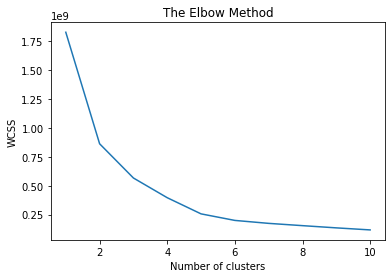

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Training the K-Means model on the dataset

In [16]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 2 ... 3 3 3]


For n_clusters = 2 The average silhouette_score is : 0.47039854146559423
For n_clusters = 3 The average silhouette_score is : 0.4356088943120378
For n_clusters = 4 The average silhouette_score is : 0.46393610376047306
For n_clusters = 5 The average silhouette_score is : 0.5102450875430599
For n_clusters = 6 The average silhouette_score is : 0.5055979028800102
For n_clusters = 7 The average silhouette_score is : 0.49862742128448645


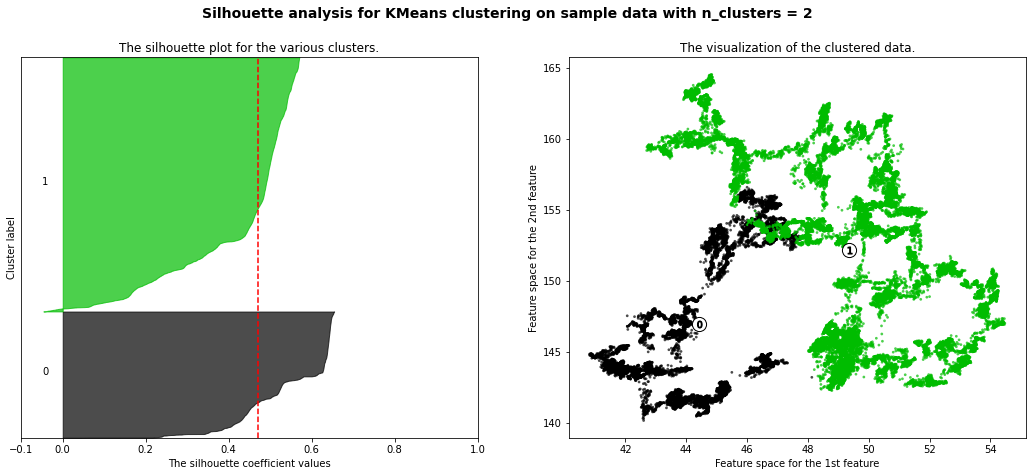

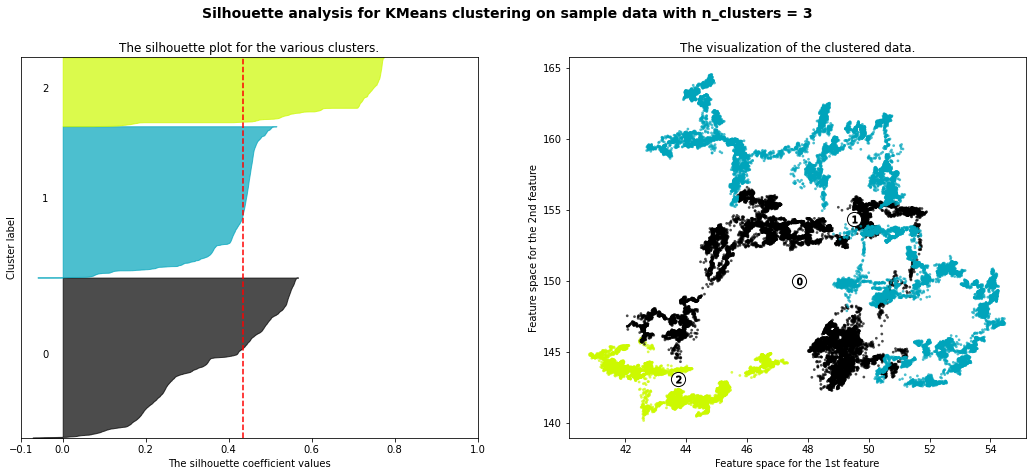

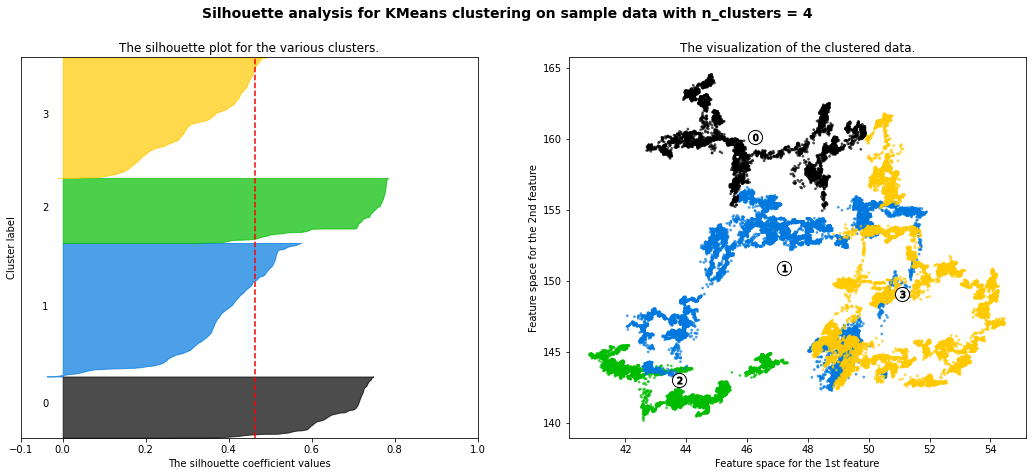

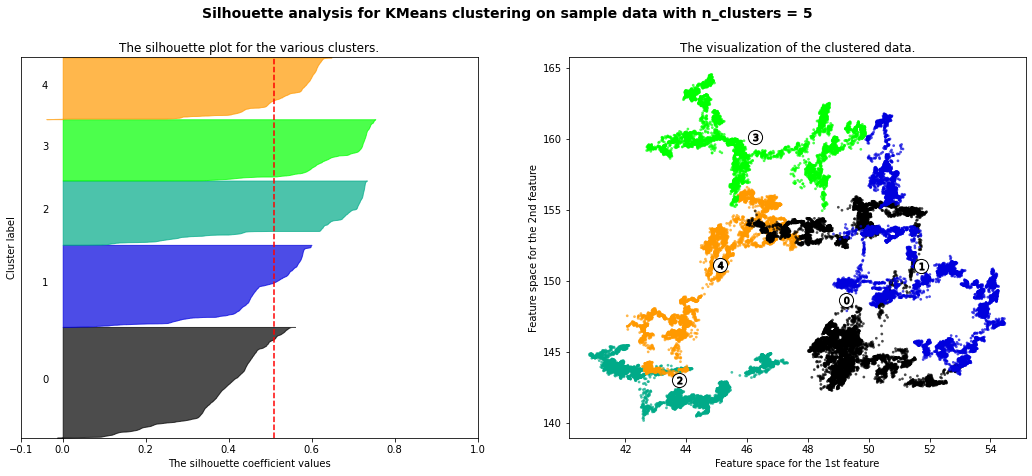

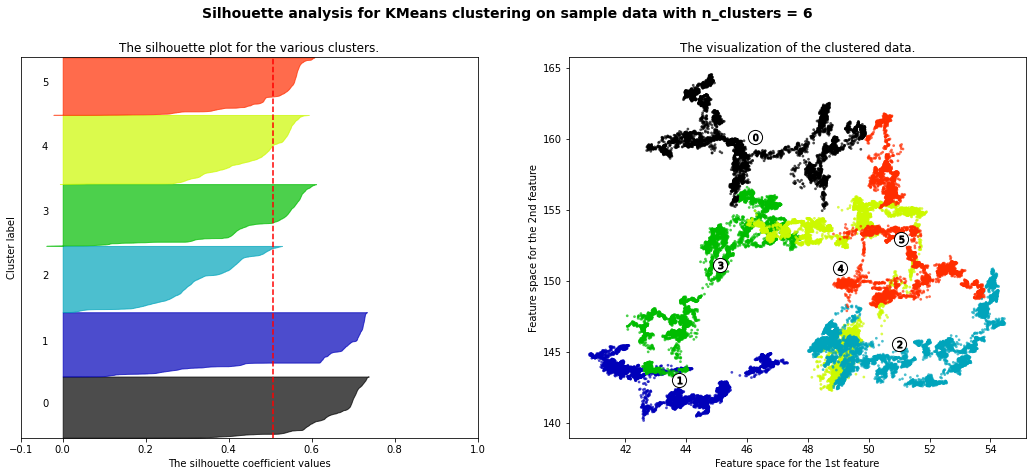

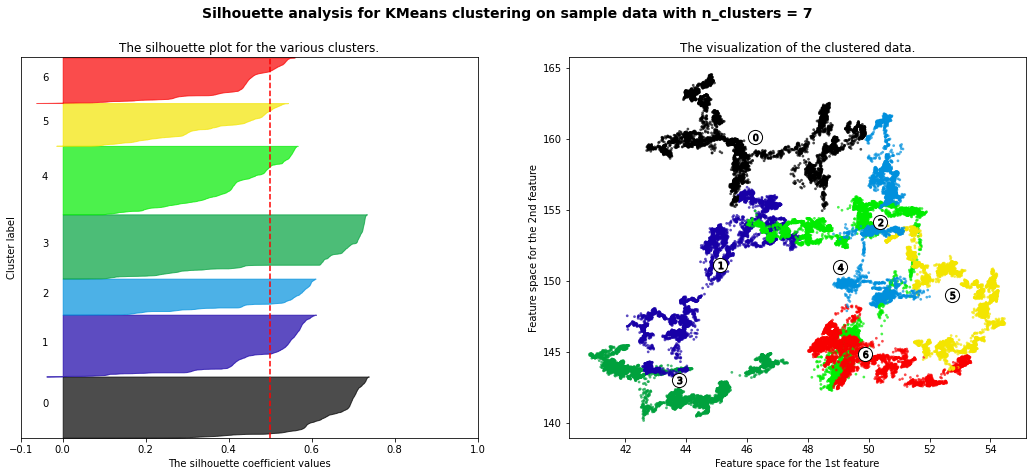

In [17]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
    y_kmeans = kmeans.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, y_kmeans)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, y_kmeans)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(y_kmeans.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

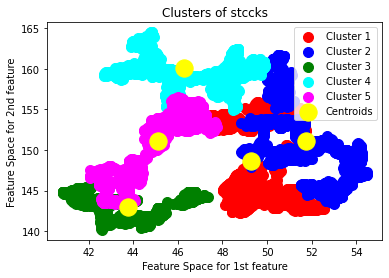

In [18]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
#plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'black', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stccks')
plt.xlabel('Feature Space for 1st feature')
plt.ylabel('Feature Space for 2nd feature')
plt.legend()
plt.show()

**Problem 3:\
Identify which all stocks are moving together and which all stocks are different from each other.**

## PCA

In [19]:
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,66.0400,34.860,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,66.0000,34.850,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,65.9200,34.930,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,66.0300,34.705,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,65.9197,34.850,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


1% of 500 is 5 which reatins 99% of variance,\
5% of 500 is 25 which retains 95% of variance.\
So, typivally, we should either 1% or 5% in which 95%-99% of the variance is retained

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X1 = df.values

# Scaling the values
sc = StandardScaler()
X1_scaled = sc.fit_transform(X1)

pca = PCA(n_components=500)
pca.fit(X1_scaled)

# the amount of variance that each PCA explains
variance = pca.explained_variance_ratio_

# cumulative varince explains
cum_var = np.cumsum(np.round(variance, decimals=4)*100)
print(cum_var)

[47.03 64.26 76.28 81.13 84.93 87.74 89.74 91.05 92.1  92.85 93.53 94.11
 94.57 95.02 95.43 95.78 96.11 96.37 96.6  96.82 97.01 97.17 97.32 97.45
 97.58 97.7  97.81 97.91 98.   98.08 98.16 98.24 98.31 98.38 98.44 98.5
 98.56 98.61 98.66 98.71 98.75 98.79 98.83 98.87 98.91 98.94 98.97 99.
 99.03 99.06 99.09 99.12 99.15 99.17 99.19 99.21 99.23 99.25 99.27 99.29
 99.31 99.33 99.35 99.37 99.39 99.41 99.43 99.45 99.46 99.47 99.48 99.49
 99.5  99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61
 99.62 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73
 99.74 99.75 99.76 99.77 99.78 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79

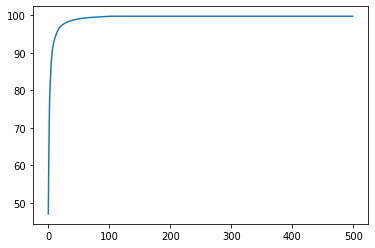

In [21]:
plt.plot(cum_var)

From the above curve, we can approximately select n value to be 25, which supports the above theory how 5% of 500 is 25 in which 95% of the variance is retained.

In [22]:
# Looking at above plot I can consider 25 variables 
pca = PCA(n_components =25)
X1 = pca.fit_transform(X1_scaled)
print(X1)

[[ 25.55018064  10.00580482  -9.38207446 ...   0.54885785   0.09660641
    2.41927419]
 [ 25.64880185   9.89282687  -9.8023104  ...   0.45081797   0.18065503
    2.31146879]
 [ 25.56345929   9.82533675  -9.67570287 ...   0.52741128   0.05344645
    2.05536563]
 ...
 [-22.76894921  13.32753802   6.56220278 ...  -2.15221554   1.19248998
   -0.31482799]
 [-22.61319638  13.41831515   6.6755356  ...  -2.13797553   1.19865522
   -0.34140769]
 [-22.72127837  13.36292841   6.60406294 ...  -2.17509282   1.1783651
   -0.30104517]]


In [23]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.03925756 0.04106421 0.0629084  ... 0.06247664 0.00253829 0.05169773]
 [0.06428354 0.033861   0.00186129 ... 0.02040637 0.08122924 0.05950068]
 [0.03985758 0.06416494 0.01207933 ... 0.02101011 0.06637293 0.02356977]
 ...
 [0.01161697 0.0053534  0.00472512 ... 0.01178585 0.04443533 0.01197757]
 [0.07422002 0.02154503 0.00906327 ... 0.00121352 0.01832034 0.04830048]
 [0.0213171  0.03310451 0.03691608 ... 0.00432008 0.02092222 0.02520571]]


In [24]:
pca_df = pd.DataFrame(pca.components_, columns = df.columns)
pca_df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039258,-0.041064,-0.062908,-0.009788,-0.035866,-0.054668,0.050356,-0.035396,-0.044060,-0.014671,-0.045844,-0.046622,-0.062225,-0.058038,0.061330,-0.036520,-0.023131,-0.063081,-0.042726,-0.037433,0.050521,-0.048147,-0.050233,-0.041296,-0.051661,0.045019,0.044934,-0.015948,-0.054274,-0.062343,0.050365,0.054124,0.055319,0.014763,0.034917,-0.058512,-0.046669,-0.057698,0.023515,-0.059597,...,0.024191,0.020594,0.017695,-0.050243,0.043083,-0.063917,-0.045327,0.032774,-0.056950,0.009274,-0.041266,-0.023636,-0.061275,-0.050227,-0.050251,-0.033725,0.010475,0.056636,-0.031001,0.007577,-0.048713,-0.051737,0.014420,-0.010062,-0.051221,-0.001774,-0.045382,-0.051358,0.032433,0.044216,-0.049413,0.057001,-0.054623,-0.050608,0.047199,-0.057897,-0.061392,-0.062477,0.002538,-0.051698
1,-0.064284,0.033861,0.001861,-0.032453,0.043511,-0.029519,0.016178,0.058286,-0.052667,0.012376,0.008276,-0.059819,-0.014067,-0.022590,0.002843,0.060093,-0.039704,0.018859,0.024876,-0.071563,0.039302,0.064126,0.056264,-0.022643,0.005253,-0.023941,0.017103,-0.091841,0.029579,-0.014380,-0.039972,-0.021169,-0.025090,-0.083046,0.042060,-0.017038,-0.020896,0.000942,0.018599,0.022192,...,-0.082757,-0.080331,-0.097981,-0.044560,-0.040748,0.008991,0.043499,-0.064066,0.021696,0.049457,-0.009179,-0.088849,0.027128,-0.054635,0.060769,0.022031,-0.094955,-0.036931,-0.050954,0.086232,-0.061008,0.019110,-0.033656,-0.098297,0.043296,0.016459,0.010216,-0.045484,0.038706,-0.022024,-0.058941,0.030277,0.013643,-0.040769,-0.052795,0.010238,0.031466,-0.020406,-0.081229,-0.059501
2,-0.039858,0.064165,0.012079,0.043266,-0.037239,0.040506,-0.053892,-0.051099,0.030738,-0.086428,-0.080478,-0.002803,0.025239,0.020571,0.019733,-0.056312,-0.057916,-0.000466,-0.081283,0.034815,-0.021305,0.011248,-0.019180,0.071252,-0.013099,0.063189,-0.009790,0.005557,-0.013773,0.017672,-0.004658,-0.050796,-0.046291,-0.037005,0.062688,0.039829,-0.026042,0.047202,-0.066280,-0.039343,...,-0.031339,-0.039283,0.014051,0.034904,-0.058635,-0.008891,-0.050986,0.023285,-0.024256,-0.077126,-0.040889,-0.003298,0.017646,0.003041,-0.016840,-0.085902,-0.008512,-0.015624,-0.001668,0.028712,0.027775,0.051346,-0.099280,-0.020981,-0.024361,-0.088845,0.053528,-0.042594,-0.027908,-0.046196,-0.003223,0.022125,0.059617,-0.034587,-0.028712,-0.039074,-0.004342,0.021010,-0.066373,0.023570
3,0.007578,0.077164,0.008564,-0.027896,-0.017418,0.008973,-0.032239,0.034448,0.051511,-0.077594,-0.023064,0.023137,0.009131,0.017253,-0.006388,-0.023895,-0.033336,-0.008681,-0.027975,0.016217,-0.035170,-0.007258,-0.010963,-0.016328,-0.076095,0.015574,0.069520,0.021339,-0.034965,0.018609,0.056918,-0.026573,-0.024124,-0.010709,0.083062,0.015559,-0.005021,0.027916,-0.124517,0.008499,...,-0.018637,-0.005838,0.018110,-0.036884,0.029455,-0.006159,0.038242,0.020207,-0.034863,0.007265,0.043023,0.063931,0.013694,-0.034292,-0.014270,0.015807,0.019401,-0.037155,-0.115547,-0.050883,0.005911,-0.057024,0.030038,0.017188,-0.028069,0.106100,0.043724,0.003303,0.033256,-0.053834,0.021692,0.060885,-0.039630,0.027694,0.012100,-0.039575,0.002900,-0.002703,-0.049420,0.015160
4,-0.033303,-0.016981,0.002438,-0.038330,-0.102023,-0.034831,-0.011187,0.037595,-0